___
# Project-13_Doctor's Consultancy Fees
___

In [1]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser

import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset

In [3]:
train_set = pd.read_excel('Final_Train.xlsx')
test_set = pd.read_excel('Final_Test.xlsx')

In [4]:
train_set.head()

Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees  
0               100% 16 Feedback Kakkanad, Ernakulam   100  
1              98% 76 Feedback Whitefield, Bangalore   350  
2                                                NaN   300  
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  
4              100% 4 Feedback Keelkattalai, Chennai   250

In [5]:
test_set.head()

Qualification           Experience  \
0                                             MBBS  35 years experience   
1       MBBS, Diploma in Otorhinolaryngology (DLO)  31 years experience   
2                                       MBBS, DDVL  40 years experience   
3                                             BAMS   0 years experience   
4  BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   

  Rating                        Place           Profile  \
0    NaN       Ghatkopar East, Mumbai  General Medicine   
1    NaN  West Marredpally, Hyderabad    ENT Specialist   
2    70%            KK Nagar, Chennai    Dermatologists   
3    NaN       New Ashok Nagar, Delhi          Ayurveda   
4   100%    Kanakpura Road, Bangalore           Dentist   

                                  Miscellaneous_Info  
0                                                NaN  
1                                                NaN  
2                   70% 4 Feedback KK Nagar, Chennai  
3                                                NaN  
4  General Dentistry Conservative Dentistry Cosme...

In [6]:
# shapes

In [7]:
train_set.shape

(5961, 7)

In [8]:
test_set.shape

(1987, 6)

In [9]:
## checking for the missing values in both of the sets

In [10]:
train_set.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [11]:
test_set.isna().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [12]:
## checking for any highly correlated features

In [13]:
train_set.corr()

Fees
Fees   1.0

In [14]:
test_set.corr()

Empty DataFrame
Columns: []
Index: []

In [15]:
# combining both of the sets ( Train and Test) for preprocesing
df = train_set.append(test_set)

In [16]:
df.head()

Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info   Fees  
0               100% 16 Feedback Kakkanad, Ernakulam  100.0  
1              98% 76 Feedback Whitefield, Bangalore  350.0  
2                                                NaN  300.0  
3  Bannerghatta Road, Bangalore ₹250 Available on...  250.0  
4              100% 4 Feedback Keelkattalai, Chennai  250.0

In [17]:
df.tail()

Qualification           Experience  \
1982                        BAMS, Doctor of Medicine  10 years experience   
1983  MD - Dermatology , Venereology & Leprosy, MBBS   4 years experience   
1984        MBBS, MD / MS - Obstetrics & Gynaecology   9 years experience   
1985                                             BDS  12 years experience   
1986  MBBS, MD - Dermatology , Venereology & Leprosy   8 years experience   

     Rating                    Place           Profile  \
1982    NaN  Basavanagudi, Bangalore          Ayurveda   
1983    NaN         Choolai, Chennai    Dermatologists   
1984    NaN           Porur, Chennai  General Medicine   
1985    98%       Arekere, Bangalore           Dentist   
1986    NaN    Pallikaranai, Chennai    Dermatologists   

                                     Miscellaneous_Info  Fees  
1982                                                NaN   NaN  
1983                                                NaN   NaN  
1984                                                NaN   NaN  
1985  RCT - Root Canal Treatment Root Canal Treatmen...   NaN  
1986              1 Feedback Pallikaranai, Chennai ₹500   NaN

In [18]:
# shape of the dataframe
df.shape

(7948, 7)

In [19]:
# 5 Samples 
df.sample(5)

Qualification           Experience  \
4924                          BDS, MDS - Prosthodontics   9 years experience   
3595                                               BHMS  23 years experience   
4374  MBBS, Post Graduate Diploma in Diabetology (PGDD)  30 years experience   
827                                                 BDS  20 years experience   
1508  MBBS, MD - Medicine, Post Graduate Diploma in ...  21 years experience   

     Rating                  Place           Profile  \
4924    NaN      Mylapore, Chennai           Dentist   
3595    NaN  Goregaon West, Mumbai         Homeopath   
4374    NaN   Andheri West, Mumbai  General Medicine   
827     97%     Madhu Vihar, Delhi           Dentist   
1508    97%   Erragadda, Hyderabad  General Medicine   

                                     Miscellaneous_Info   Fees  
4924  Surgical Tooth Extraction Tooth Extraction Ora...  500.0  
3595                                                NaN   50.0  
4374                                                NaN  250.0  
827   Acrylic Partial Denture Crowns and Bridges Fix...  200.0  
1508  Infectious Disease Treatment Path Laboratory E...  300.0

In [20]:
# info on the daatypes of the dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
dtypes: float64(1), object(6)
memory usage: 496.8+ KB


In [22]:
# description on the dataset.

In [23]:
df.describe()

Fees
count  5961.000000
mean    307.944640
std     190.920373
min       5.000000
25%     150.000000
50%     300.000000
75%     500.000000
max     950.000000

In [24]:
df.describe(include='all')

Qualification          Experience Rating                 Place  \
count           7948                7948   3556                  7917   
unique          1801                  64     52                   948   
top              BDS  9 years experience   100%  Andheri West, Mumbai   
freq             632                 419    907                    97   
mean             NaN                 NaN    NaN                   NaN   
std              NaN                 NaN    NaN                   NaN   
min              NaN                 NaN    NaN                   NaN   
25%              NaN                 NaN    NaN                   NaN   
50%              NaN                 NaN    NaN                   NaN   
75%              NaN                 NaN    NaN                   NaN   
max              NaN                 NaN    NaN                   NaN   

        Profile                                 Miscellaneous_Info  \
count      7948                                               4494   
unique        6                                               3980   
top     Dentist  Acrylic Partial Denture Crowns and Bridges Fix...   
freq       1838                                                 50   
mean        NaN                                                NaN   
std         NaN                                                NaN   
min         NaN                                                NaN   
25%         NaN                                                NaN   
50%         NaN                                                NaN   
75%         NaN                                                NaN   
max         NaN                                                NaN   

               Fees  
count   5961.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean     307.944640  
std      190.920373  
min        5.000000  
25%      150.000000  
50%      300.000000  
75%      500.000000  
max      950.000000

In [25]:
# checking for the missing data or dirty data in the dataset.

In [26]:
df.isna().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

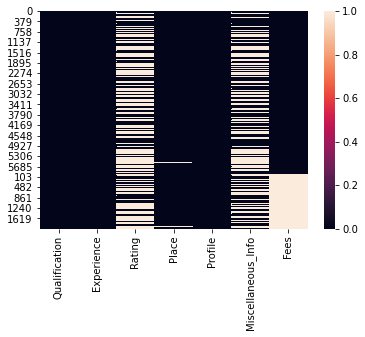

In [27]:
# plotting the missing values on a heatmap
sns.heatmap(df.isna())

In [28]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [29]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986],
           dtype='int64', length=7948)

* There are total around 5960 samples in the dataset.
* There are total 6 feature variable and 1 target variable.
* We have 2 features with missing values.
* There is only 1 numberical column (that is the target variable) and rest of the columns are categorical type features.
* As there is only 1 numerical column, there is no issue of highly correlation features.

## Univariate Analysis and Feature Processing

In [30]:
df_cleaned = df.copy()

In [31]:
df.head()

Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info   Fees  
0               100% 16 Feedback Kakkanad, Ernakulam  100.0  
1              98% 76 Feedback Whitefield, Bangalore  350.0  
2                                                NaN  300.0  
3  Bannerghatta Road, Bangalore ₹250 Available on...  250.0  
4              100% 4 Feedback Keelkattalai, Chennai  250.0

In [32]:
# Qualification

In [33]:
df.Qualification.value_counts()

BDS                                                                    632
BHMS                                                                   627
BAMS                                                                   624
MBBS                                                                   441
MBBS, MS - ENT                                                         280
                                                                      ... 
BDS, Advanced Certificate Course in Dental Implants                      1
BDS, Certificate in Orthodontics                                         1
MBBS, MD - General Medicine, MRCP (UK), FRCP                             1
MBBS, DVL, MD - Dermatology , Venereology & Leprosy                      1
BDS, Certificate in Dental Implants, Certificate in Dental Implants      1
Name: Qualification, Length: 1801, dtype: int64

In [34]:
df_cleaned.Qualification = df.Qualification.apply(lambda x:x.split(",")[0])

In [35]:
df_cleaned.Qualification.value_counts()

MBBS                             3313
BDS                              1579
BAMS                              939
BHMS                              938
MD - Dermatology                  102
                                 ... 
FAGE                                1
FICD                                1
FFDRCSI                             1
Diploma in Medical Trichology       1
DM - Nephrology                     1
Name: Qualification, Length: 181, dtype: int64

In [36]:
main_qualications = ['MBBS', 'BDS', 'BAMS', 'BHMS']

In [37]:
df_cleaned

Qualification           Experience Rating  \
0                  BHMS  24 years experience   100%   
1                  BAMS  12 years experience    98%   
2                  MBBS   9 years experience    NaN   
3         BSc - Zoology  12 years experience    NaN   
4                  BAMS  20 years experience   100%   
...                 ...                  ...    ...   
1982               BAMS  10 years experience    NaN   
1983  MD - Dermatology    4 years experience    NaN   
1984               MBBS   9 years experience    NaN   
1985                BDS  12 years experience    98%   
1986               MBBS   8 years experience    NaN   

                             Place           Profile  \
0              Kakkanad, Ernakulam         Homeopath   
1            Whitefield, Bangalore          Ayurveda   
2       Mathikere - BEL, Bangalore    ENT Specialist   
3     Bannerghatta Road, Bangalore          Ayurveda   
4            Keelkattalai, Chennai          Ayurveda   
...                            ...               ...   
1982       Basavanagudi, Bangalore          Ayurveda   
1983              Choolai, Chennai    Dermatologists   
1984                Porur, Chennai  General Medicine   
1985            Arekere, Bangalore           Dentist   
1986         Pallikaranai, Chennai    Dermatologists   

                                     Miscellaneous_Info   Fees  
0                  100% 16 Feedback Kakkanad, Ernakulam  100.0  
1                 98% 76 Feedback Whitefield, Bangalore  350.0  
2                                                   NaN  300.0  
3     Bannerghatta Road, Bangalore ₹250 Available on...  250.0  
4                 100% 4 Feedback Keelkattalai, Chennai  250.0  
...                                                 ...    ...  
1982                                                NaN    NaN  
1983                                                NaN    NaN  
1984                                                NaN    NaN  
1985  RCT - Root Canal Treatment Root Canal Treatmen...    NaN  
1986              1 Feedback Pallikaranai, Chennai ₹500    NaN  

[7948 rows x 7 columns]

In [38]:
df_cleaned[~df_cleaned.Qualification.isin(main_qualications)]['Qualification'].apply(lambda x:x.split(" ")[0])

3           BSc
9           BSc
20          MDS
29      Diploma
33           DM
         ...   
1966         MD
1967        MDS
1970        MDS
1980        MDS
1983         MD
Name: Qualification, Length: 1179, dtype: object

In [39]:
df_cleaned.Qualification = df_cleaned.Qualification.apply(lambda x: x.split(' ')[0])

In [40]:
pd.DataFrame(df_cleaned.Qualification.value_counts()).Qualification[:60]

MBBS             3313
BDS              1579
BAMS              939
BHMS              938
MD                418
MDS               225
MS                146
DNB                58
DHMS               47
Diploma            39
DDVL               33
Get                30
LCEH               19
B.Sc               15
Fellowship         11
BSc                 9
Post                9
PhD                 9
BSAM                8
DVD                 6
DM                  5
DDV                 5
Certification       4
MRCP                4
Certificate         3
G.A.M.S             3
FRCS                3
MRCS                3
MDS-Oral            2
MRCGP               2
M.D.                2
FCPS                2
GCEH                2
MPH                 2
FRCP                2
MSc                 2
BEMS                2
MRCPS               2
MD-DVL              2
Doctor              2
DEHM                1
PGD                 1
BIMS                1
POST                1
Cochlear            1
DNHE      

In [41]:
main_qualications = ['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD', 'MDS', 'MS']

In [42]:
df_cleaned.Qualification = df_cleaned.Qualification.mask(~df_cleaned.Qualification.isin(main_qualications),'Other')

In [43]:
df_cleaned.Qualification.value_counts()

MBBS     3313
BDS      1579
BAMS      939
BHMS      938
MD        418
Other     390
MDS       225
MS        146
Name: Qualification, dtype: int64

In [44]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

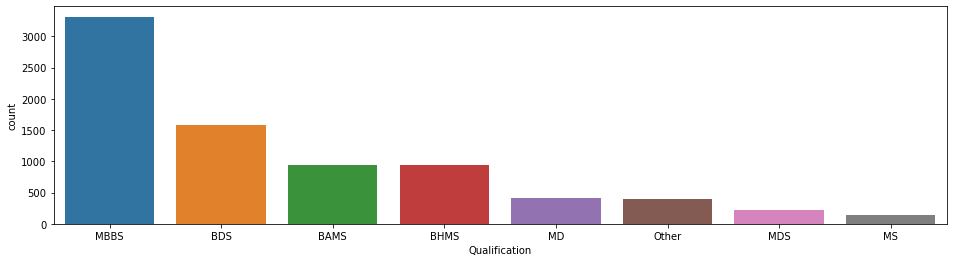

In [45]:
fig_this_size(16,4)
sns.countplot(df_cleaned.Qualification,order=df_cleaned.Qualification.value_counts().index)

* Most of the Doctors ahve the MBBS qualification.(Bachelor of Medicine and Bachelor of Surgery) So these the surgeons. 
* The next are the doctors with the BDS degree (Bachelor of Dental Surgery). So these are the Dentists.
* The next are the doctors with the BAMS degree. (Bachelor of Ayurvedic Medicine and Surgery). There are the aurvedic doctor.

In [46]:
## Experience

In [47]:
df.Experience

0       24 years experience
1       12 years experience
2        9 years experience
3       12 years experience
4       20 years experience
               ...         
1982    10 years experience
1983     4 years experience
1984     9 years experience
1985    12 years experience
1986     8 years experience
Name: Experience, Length: 7948, dtype: object

In [48]:
df_cleaned.Experience = df.Experience.str.extract('(\d+)')
df_cleaned.rename(columns={'Experience':'Yrs_of_Exp'},inplace=True)

In [49]:
df_cleaned.head()

Qualification Yrs_of_Exp Rating                         Place  \
0          BHMS         24   100%           Kakkanad, Ernakulam   
1          BAMS         12    98%         Whitefield, Bangalore   
2          MBBS          9    NaN    Mathikere - BEL, Bangalore   
3         Other         12    NaN  Bannerghatta Road, Bangalore   
4          BAMS         20   100%         Keelkattalai, Chennai   

          Profile                                 Miscellaneous_Info   Fees  
0       Homeopath               100% 16 Feedback Kakkanad, Ernakulam  100.0  
1        Ayurveda              98% 76 Feedback Whitefield, Bangalore  350.0  
2  ENT Specialist                                                NaN  300.0  
3        Ayurveda  Bannerghatta Road, Bangalore ₹250 Available on...  250.0  
4        Ayurveda              100% 4 Feedback Keelkattalai, Chennai  250.0

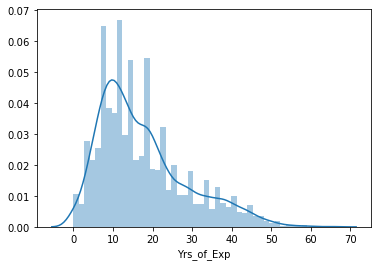

In [50]:
sns.distplot(df_cleaned.Yrs_of_Exp)

In [51]:
df_cleaned.Yrs_of_Exp.dtype

dtype('O')

In [52]:
#type conversion
df_cleaned.Yrs_of_Exp = df_cleaned.Yrs_of_Exp.astype('int')

In [53]:
df_cleaned.Yrs_of_Exp.dtype

dtype('int32')

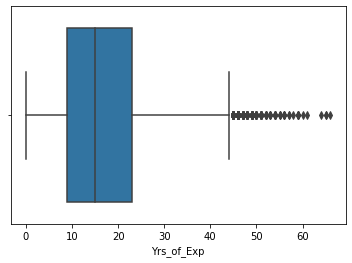

In [54]:
sns.boxplot(df_cleaned.Yrs_of_Exp)

In [55]:
df_cleaned.Yrs_of_Exp.describe()

count    7948.000000
mean       17.446653
std        11.201217
min         0.000000
25%         9.000000
50%        15.000000
75%        23.000000
max        66.000000
Name: Yrs_of_Exp, dtype: float64

In [56]:
df_cleaned.kurtosis()

Yrs_of_Exp    0.524919
Fees         -0.162059
dtype: float64

## Rating

In [57]:
df.Rating.value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
92%      95
90%      95
91%      86
88%      54
89%      53
85%      35
83%      32
82%      32
86%      27
80%      26
87%      25
84%      20
67%      17
77%      17
71%      16
81%      15
79%      15
76%      13
73%      13
60%      11
75%       8
70%       8
78%       7
74%       7
69%       6
55%       5
56%       5
68%       5
64%       4
57%       3
72%       3
33%       2
65%       2
63%       2
53%       2
62%       2
36%       1
47%       1
7%        1
48%       1
52%       1
45%       1
40%       1
58%       1
Name: Rating, dtype: int64

In [58]:
df_cleaned.Rating = df.Rating.str.strip('%').astype('float')

In [59]:
df_cleaned.Rating.dtype

dtype('float64')

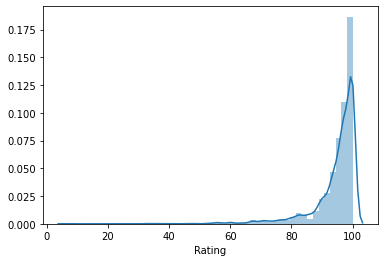

In [60]:
sns.distplot(df_cleaned.Rating)

In [61]:
# address missing values in the ratings feature

In [62]:
# LEt's try stripping of the first 1 percent of the data 

In [63]:
len(df_cleaned)

7948

In [64]:
len(df)

7948

In [65]:
# total count of missing value
df.Rating.isna().sum()

4392

In [66]:
# total percentage of mising values from the column
df.Rating.isna().mean()

0.552591847005536

In [67]:
# ratings vs fees

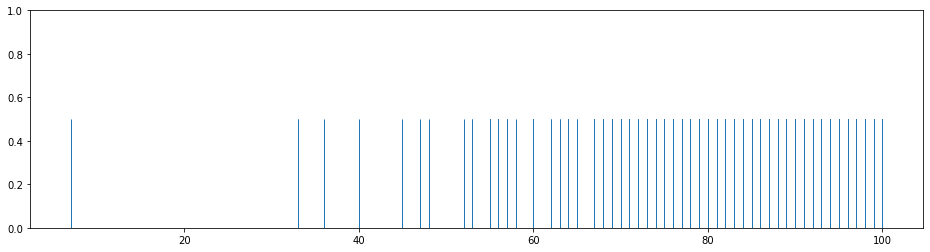

In [68]:
fig_this_size(16,4)
sns.rugplot(df_cleaned.Rating,height=0.5)

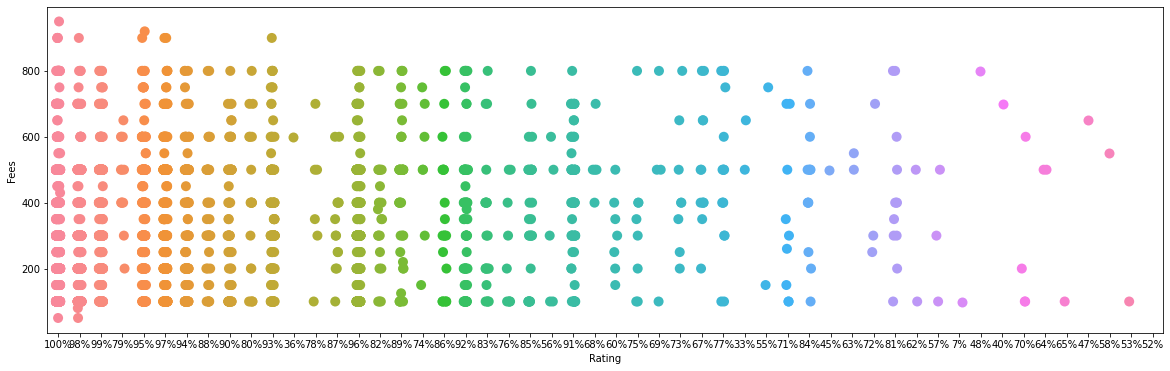

In [69]:
fig_this_size(20,6)
sns.stripplot(df.Rating,df.Fees,s=10)

In [70]:
from feature_engine.missing_data_imputers import RandomSampleImputer,EndTailImputer,MeanMedianImputer

In [71]:
imputers = [RandomSampleImputer(variables=['Rating']),EndTailImputer(variables=['Rating']),MeanMedianImputer(variables=['Rating'])]

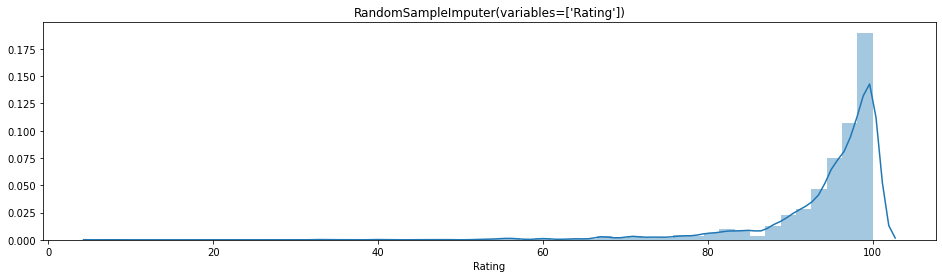

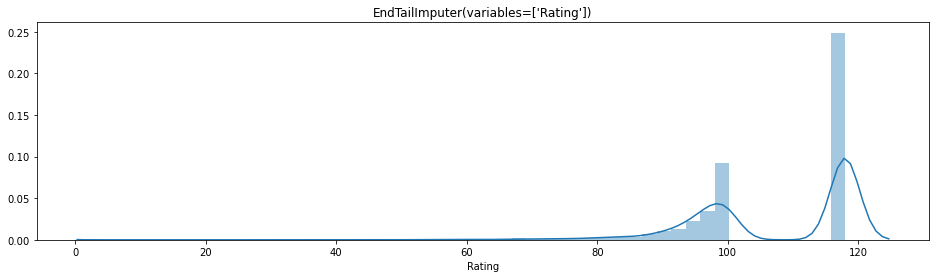

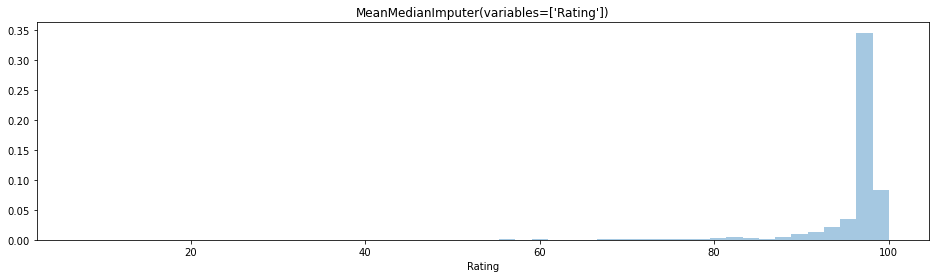

In [72]:
for imputer in imputers:
    fig_this_size(16,4)
    sns.distplot(imputer.fit_transform(df_cleaned)['Rating'])
    plt.title(imputer)

* Random sample imputation is giving us the best results.
* Let's finaize this imputation technique for the feature Ratings.

In [73]:
df_cleaned = RandomSampleImputer(variables=['Rating']).fit_transform(df_cleaned)

In [74]:
df_cleaned.Rating.isna().sum()

0

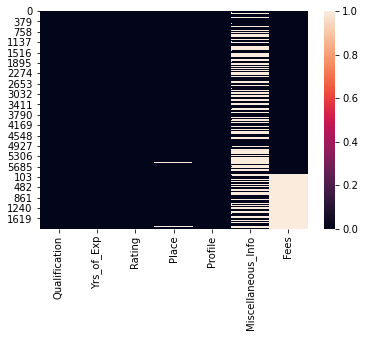

In [75]:
sns.heatmap(df_cleaned.isna())

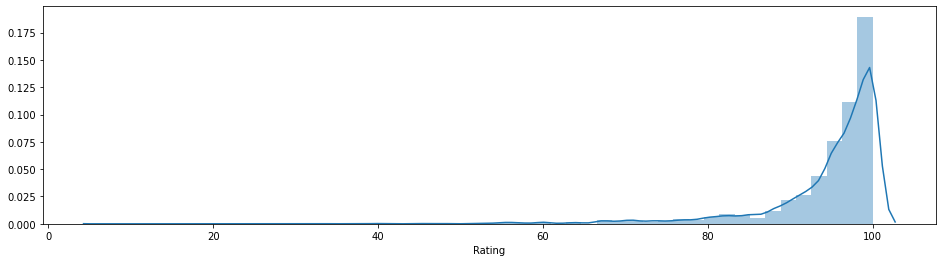

In [76]:
# revised distribution of Ratings feature
fig_this_size(16,4)
sns.distplot(df_cleaned.Rating)

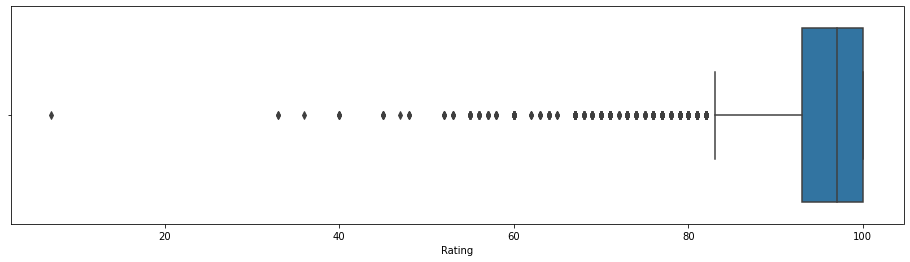

In [77]:
fig_this_size(16,4)
sns.boxplot(df_cleaned.Rating)

In [78]:
# let's strip first 1 percentile of the data from wrt to the Ratings feature.

In [79]:
q = df_cleaned.Rating.quantile(0.01)

In [80]:
q

60.0

In [81]:
df_cleaned[df_cleaned.Rating  > q]

Qualification  Yrs_of_Exp  Rating                         Place  \
0             BHMS          24   100.0           Kakkanad, Ernakulam   
1             BAMS          12    98.0         Whitefield, Bangalore   
2             MBBS           9   100.0    Mathikere - BEL, Bangalore   
3            Other          12    88.0  Bannerghatta Road, Bangalore   
4             BAMS          20   100.0         Keelkattalai, Chennai   
...            ...         ...     ...                           ...   
1982          BAMS          10   100.0       Basavanagudi, Bangalore   
1983            MD           4   100.0              Choolai, Chennai   
1984          MBBS           9   100.0                Porur, Chennai   
1985           BDS          12    98.0            Arekere, Bangalore   
1986          MBBS           8    92.0         Pallikaranai, Chennai   

               Profile                                 Miscellaneous_Info  \
0            Homeopath               100% 16 Feedback Kakkanad, Ernakulam   
1             Ayurveda              98% 76 Feedback Whitefield, Bangalore   
2       ENT Specialist                                                NaN   
3             Ayurveda  Bannerghatta Road, Bangalore ₹250 Available on...   
4             Ayurveda              100% 4 Feedback Keelkattalai, Chennai   
...                ...                                                ...   
1982          Ayurveda                                                NaN   
1983    Dermatologists                                                NaN   
1984  General Medicine                                                NaN   
1985           Dentist  RCT - Root Canal Treatment Root Canal Treatmen...   
1986    Dermatologists              1 Feedback Pallikaranai, Chennai ₹500   

       Fees  
0     100.0  
1     350.0  
2     300.0  
3     250.0  
4     250.0  
...     ...  
1982    NaN  
1983    NaN  
1984    NaN  
1985    NaN  
1986    NaN  

[7863 rows x 7 columns]

In [82]:
len(df_cleaned[df_cleaned.Rating  > q])

7863

In [83]:
len(df)

7948

In [84]:
5961-5895

66

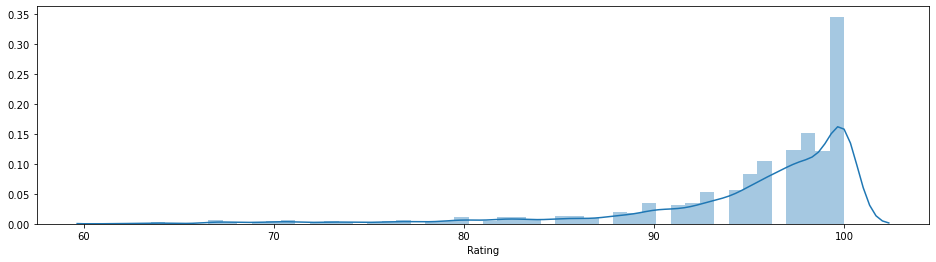

In [85]:
fig_this_size(16,4)
sns.distplot(df_cleaned[df_cleaned.Rating > q]['Rating'])

* Loosing just 1 perncent of the data 66 samples can potension increase this negative skew.

In [86]:
df_cleaned = df_cleaned[df_cleaned.Rating > q]

In [87]:
len(df)

7948

In [88]:
len(df_cleaned)

7863

In [89]:
## Place

In [90]:
df.Place.value_counts()

Andheri West, Mumbai              97
HSR Layout, Bangalore             97
Dwarka, Delhi                     93
Banjara Hills, Hyderabad          85
Mulund West, Mumbai               81
                                  ..
Thonnakkal, Thiruvananthapuram     1
Vikas Nagar, Delhi                 1
Rani Khera, Delhi                  1
Gandhi Nagar, Delhi                1
Gandhi Nagar, Chennai              1
Name: Place, Length: 948, dtype: int64

In [91]:
len(df.Place.unique())

949

In [92]:
df.Place

0                Kakkanad, Ernakulam
1              Whitefield, Bangalore
2         Mathikere - BEL, Bangalore
3       Bannerghatta Road, Bangalore
4              Keelkattalai, Chennai
                    ...             
1982         Basavanagudi, Bangalore
1983                Choolai, Chennai
1984                  Porur, Chennai
1985              Arekere, Bangalore
1986           Pallikaranai, Chennai
Name: Place, Length: 7948, dtype: object

In [93]:
df.Place.isna().sum()

31

In [94]:
# let's impute there 25 values using the frequancy encoder.

In [95]:
from feature_engine.missing_data_imputers import CategoricalVariableImputer

In [96]:
enc = CategoricalVariableImputer(imputation_method='frequent',variables=['Place'])

In [97]:
df_cleaned = enc.fit_transform(df_cleaned)

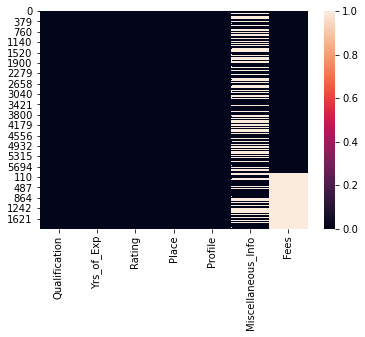

In [98]:
sns.heatmap(df_cleaned.isna())

In [100]:
df_cleaned.Place = df_cleaned.Place.apply(lambda x : x.split(' ')[-1])

In [101]:
df_cleaned.Place.value_counts()

Bangalore             1689
Mumbai                1596
Delhi                 1585
Hyderabad             1268
Chennai               1125
Coimbatore             296
Ernakulam              200
Thiruvananthapuram     103
e                        1
Name: Place, dtype: int64

In [102]:
# get rid of that dirty value

In [103]:
df_cleaned = df_cleaned[df_cleaned.Place != 'e']

In [104]:
df_cleaned.Place.value_counts()

Bangalore             1689
Mumbai                1596
Delhi                 1585
Hyderabad             1268
Chennai               1125
Coimbatore             296
Ernakulam              200
Thiruvananthapuram     103
Name: Place, dtype: int64

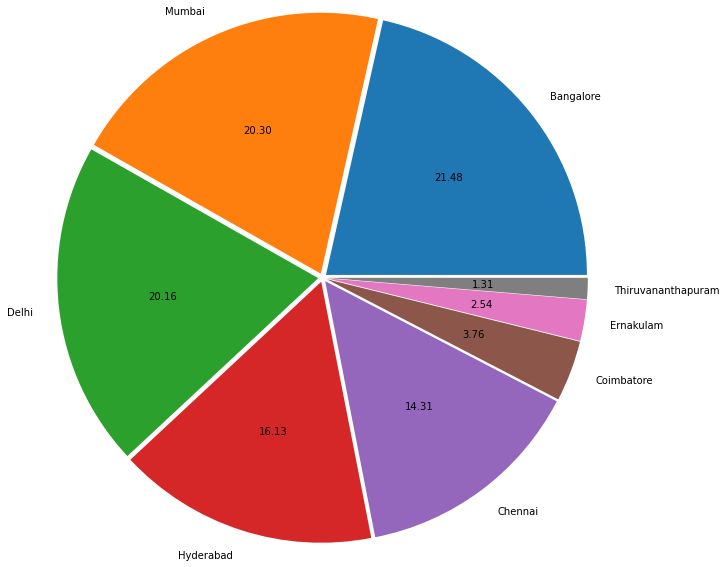

In [105]:
plt.pie(x = df_cleaned.Place.value_counts(),explode=np.repeat(0.05,repeats=len(df_cleaned.Place.unique())),radius=3,labels=df_cleaned.Place.value_counts().index,autopct="%0.2f");

In [106]:
## Profile

In [107]:
df.Profile.value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [108]:
px.bar(df_cleaned,df_cleaned.Place.value_counts().index,df_cleaned.Place.value_counts())

In [109]:
## profile

In [110]:
df.Profile.value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

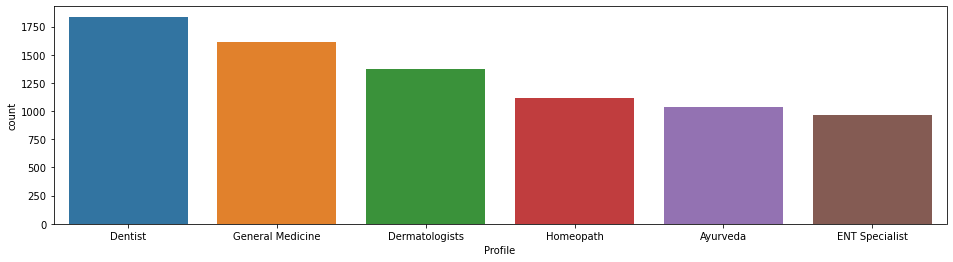

In [111]:
fig_this_size(16,4)
sns.countplot(df.Profile,order=df.Profile.value_counts().index)

* Most of the doctors are dentitsts by speciality.

In [112]:
## Miscelleanous_Info

In [113]:
df_cleaned.Miscellaneous_Info.value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                   50
Skin Allergy Treatment Skin Allergies Dermabrasion                                   17
Tooth Extraction Dental Fillings Scaling / Polishing                                 16
Dental Fillings Zirconia Crowns Dental Implant Fixing                                15
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                              14
                                                                                     ..
83% 17 Feedback Khairatabad, Hyderabad                                                1
83% 8 Feedback Kondapur, Hyderabad                                                    1
Microdermabrasion Wrinkle Treatment Skin Tag Treatment                                1
97% 77 Feedback Kalkere, Bangalore                                                    1
Impaction / Impacted Tooth Extraction Endo Surgery Or Apicoectomy Dental Fillings     1
Name: Miscellaneous_Info, Length

* This feature is the general info.
* It contains some address,some specialzations, some feedbacks.
* We have all of these features ready thus, this is a redundant feature.
* Let's drop this feature.

In [114]:
df_cleaned.drop('Miscellaneous_Info',1,inplace=True)

In [115]:
df_cleaned

Qualification  Yrs_of_Exp  Rating      Place           Profile   Fees
0             BHMS          24   100.0  Ernakulam         Homeopath  100.0
1             BAMS          12    98.0  Bangalore          Ayurveda  350.0
2             MBBS           9   100.0  Bangalore    ENT Specialist  300.0
3            Other          12    88.0  Bangalore          Ayurveda  250.0
4             BAMS          20   100.0    Chennai          Ayurveda  250.0
...            ...         ...     ...        ...               ...    ...
1982          BAMS          10   100.0  Bangalore          Ayurveda    NaN
1983            MD           4   100.0    Chennai    Dermatologists    NaN
1984          MBBS           9   100.0    Chennai  General Medicine    NaN
1985           BDS          12    98.0  Bangalore           Dentist    NaN
1986          MBBS           8    92.0    Chennai    Dermatologists    NaN

[7862 rows x 6 columns]

In [116]:
## Fees ( The target variable)

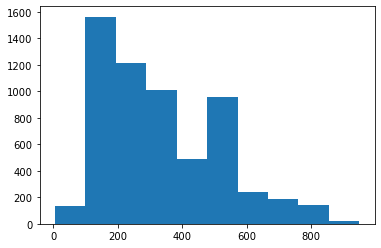

In [117]:
plt.hist(df.Fees);

In [118]:
df.Fees.describe()

count    5961.000000
mean      307.944640
std       190.920373
min         5.000000
25%       150.000000
50%       300.000000
75%       500.000000
max       950.000000
Name: Fees, dtype: float64

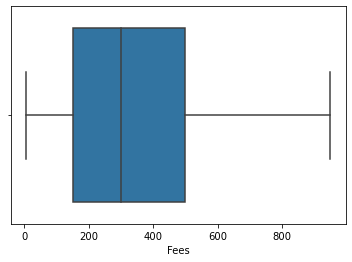

In [119]:
sns.boxplot(df.Fees)

In [120]:
## Multivariate analysis.

* Fees with respect to the Qualification of the doctors:

MBBS
BDS
BAMS
BHMS
MD
Other
MDS
MS


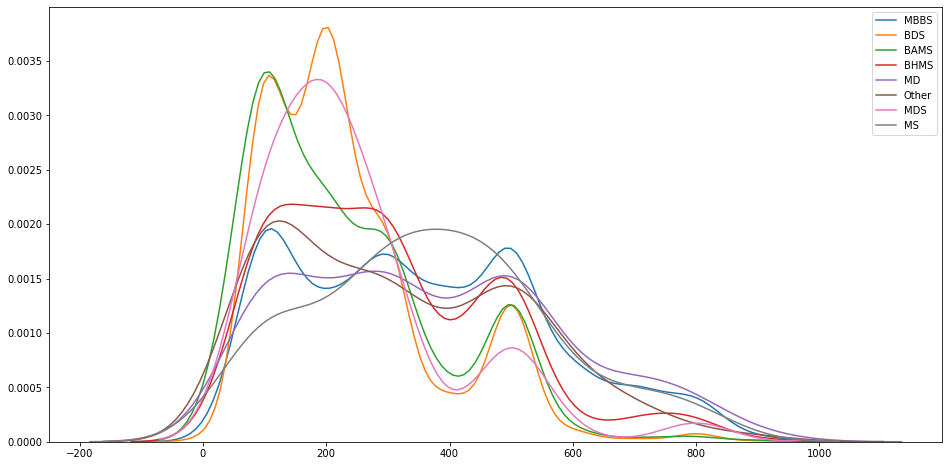

In [121]:
fig_this_size(16,8)
for Q in df_cleaned.Qualification.value_counts().index:
    print(Q)
    sns.kdeplot(df_cleaned[df_cleaned.Qualification == Q]['Fees'],label=Q)

* The doctors with BDS MDS charge high fees. We can infer that the fees or a dentitst is much higher that that of an MBBS .

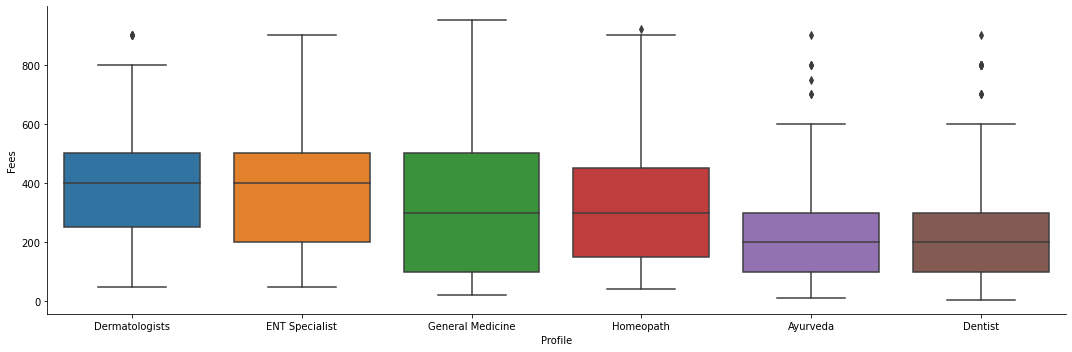

In [122]:
sns.catplot(x='Profile',y='Fees',data=df_cleaned,kind='box',aspect=3,order=df_cleaned.groupby('Profile')['Fees'].mean().sort_values(ascending=False).index)

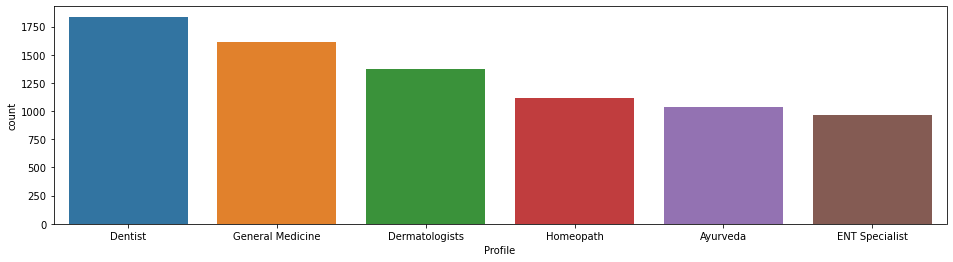

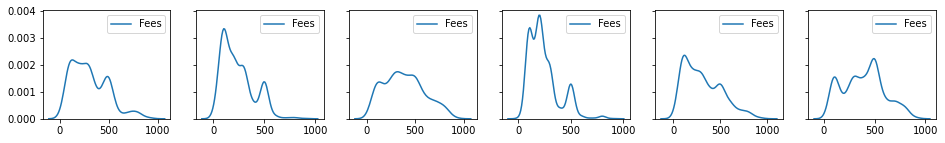

In [123]:
fig_this_size(16,4)
sns.countplot(x=df['Profile'],order=df_cleaned.Profile.value_counts().index)

fig,ax = plt.subplots(1,6,figsize=(16,2),sharey=True)
for i,cat in enumerate(df_cleaned.Profile.unique()):

    sns.kdeplot(df_cleaned[df_cleaned.Profile == cat]['Fees'],ax=ax[i])


In [124]:
df_cleaned[df_cleaned.Profile == 'Dentist']['Fees'].var()

20092.86236287758

In [125]:
df_cleaned[df_cleaned.Profile == 'Dermatologists']['Fees'].var()

40778.81097560955

In [126]:
# years of experience vs Ratings

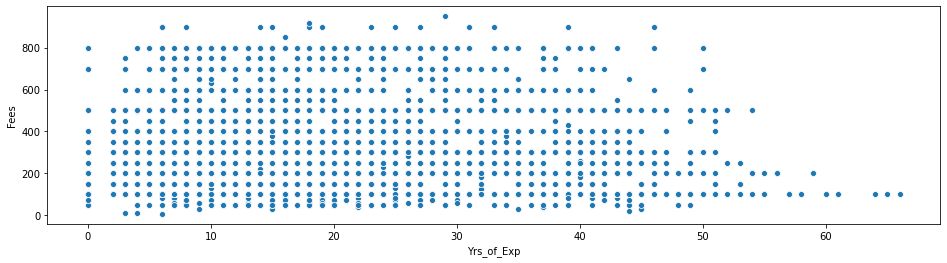

In [127]:
fig_this_size(16,4)
sns.scatterplot(df_cleaned.Yrs_of_Exp,df_cleaned.Fees)

In [128]:
## Fees with respect to places.

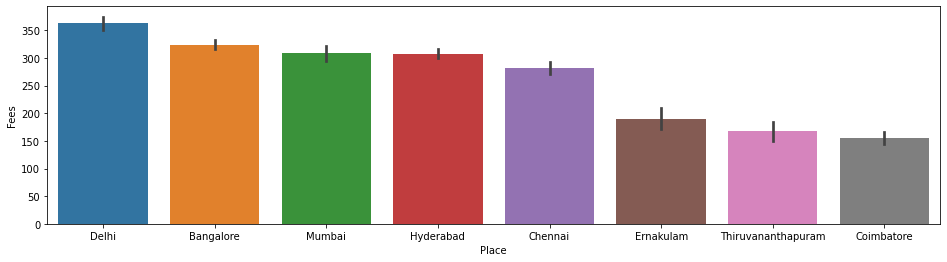

In [129]:
fig_this_size(16,4)
sns.barplot(df_cleaned.Place,df_cleaned.Fees,order=df_cleaned.groupby('Place')['Fees'].mean().sort_values(ascending=False).index)

* Banglore has the highest aveage Doctor's Consulatancy Fees.

In [130]:
# ratings with respect to places.

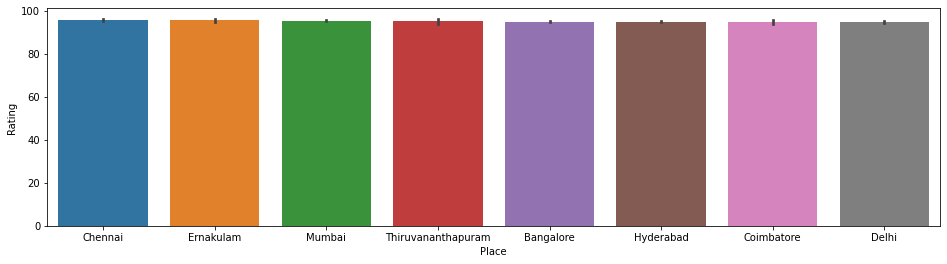

In [131]:
fig_this_size(16,4)
sns.barplot(df_cleaned.Place,df_cleaned.Rating,order=df_cleaned.groupby('Place')['Rating'].mean().sort_values(ascending=False).index)

* Ratings are independent of the Place.

## Removing the outliers of the dataset

In [132]:
# let's seperate the numerical features and the categorical features in different lists.

In [133]:
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

In [134]:
num_var = _find_numerical_variables(df_cleaned)
cat_var = _find_categorical_variables(df_cleaned)

In [135]:
df

Qualification           Experience  \
0                              BHMS, MD - Homeopathy  24 years experience   
1                       BAMS, MD - Ayurveda Medicine  12 years experience   
2                     MBBS, MS - Otorhinolaryngology   9 years experience   
3                                BSc - Zoology, BAMS  12 years experience   
4                                               BAMS  20 years experience   
...                                              ...                  ...   
1982                        BAMS, Doctor of Medicine  10 years experience   
1983  MD - Dermatology , Venereology & Leprosy, MBBS   4 years experience   
1984        MBBS, MD / MS - Obstetrics & Gynaecology   9 years experience   
1985                                             BDS  12 years experience   
1986  MBBS, MD - Dermatology , Venereology & Leprosy   8 years experience   

     Rating                         Place           Profile  \
0      100%           Kakkanad, Ernakulam         Homeopath   
1       98%         Whitefield, Bangalore          Ayurveda   
2       NaN    Mathikere - BEL, Bangalore    ENT Specialist   
3       NaN  Bannerghatta Road, Bangalore          Ayurveda   
4      100%         Keelkattalai, Chennai          Ayurveda   
...     ...                           ...               ...   
1982    NaN       Basavanagudi, Bangalore          Ayurveda   
1983    NaN              Choolai, Chennai    Dermatologists   
1984    NaN                Porur, Chennai  General Medicine   
1985    98%            Arekere, Bangalore           Dentist   
1986    NaN         Pallikaranai, Chennai    Dermatologists   

                                     Miscellaneous_Info   Fees  
0                  100% 16 Feedback Kakkanad, Ernakulam  100.0  
1                 98% 76 Feedback Whitefield, Bangalore  350.0  
2                                                   NaN  300.0  
3     Bannerghatta Road, Bangalore ₹250 Available on...  250.0  
4                 100% 4 Feedback Keelkattalai, Chennai  250.0  
...                                                 ...    ...  
1982                                                NaN    NaN  
1983                                                NaN    NaN  
1984                                                NaN    NaN  
1985  RCT - Root Canal Treatment Root Canal Treatmen...    NaN  
1986              1 Feedback Pallikaranai, Chennai ₹500    NaN  

[7948 rows x 7 columns]

In [136]:
num_var

['Yrs_of_Exp', 'Rating', 'Fees']

In [137]:
cat_var

['Qualification', 'Place', 'Profile']

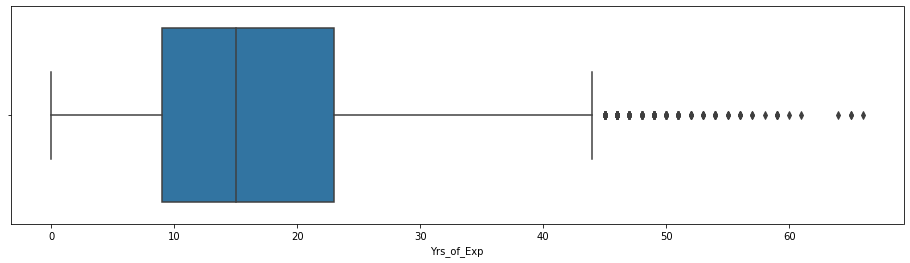

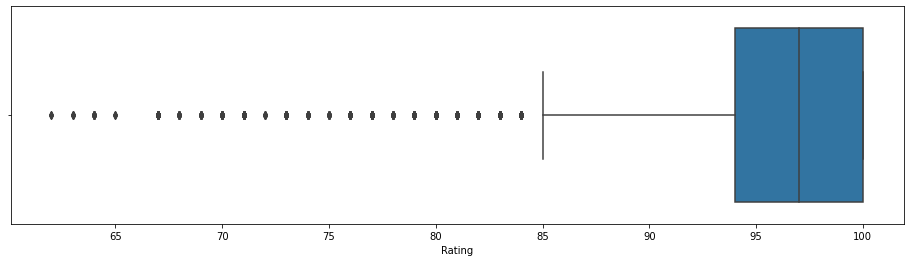

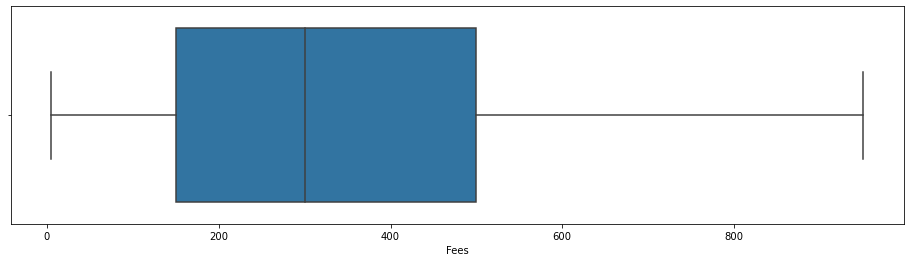

In [138]:
for col in num_var:
    fig_this_size(16,4,)
    sns.boxplot(df_cleaned[col])

* Let's address the skews before removing the outliers as we can ot see any extreme outliers visually from the boxplot.

In [139]:
len(df_cleaned)

7862

In [140]:
num_var

['Yrs_of_Exp', 'Rating', 'Fees']

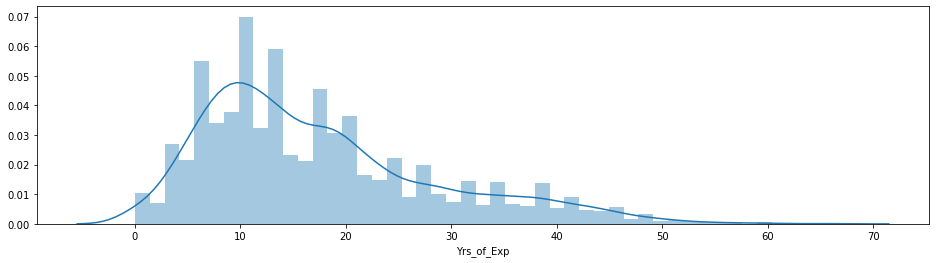

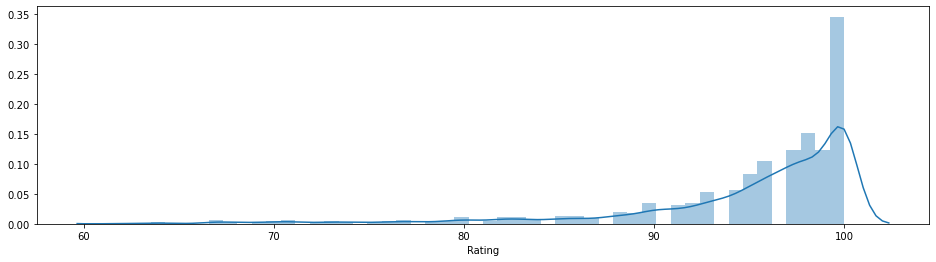

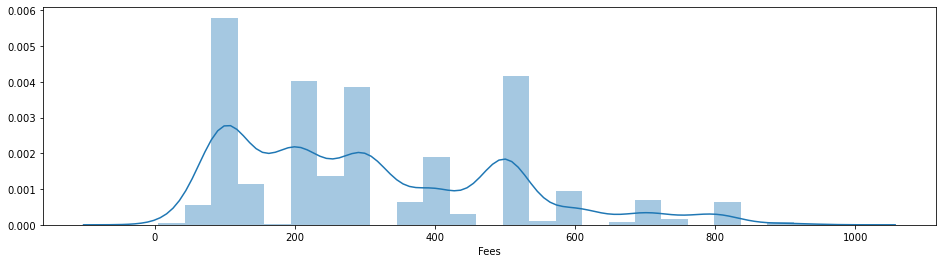

In [141]:
for col in num_var:
    fig_this_size(16,4,)
    sns.distplot(df_cleaned[col])

In [142]:
df_cleaned

Qualification  Yrs_of_Exp  Rating      Place           Profile   Fees
0             BHMS          24   100.0  Ernakulam         Homeopath  100.0
1             BAMS          12    98.0  Bangalore          Ayurveda  350.0
2             MBBS           9   100.0  Bangalore    ENT Specialist  300.0
3            Other          12    88.0  Bangalore          Ayurveda  250.0
4             BAMS          20   100.0    Chennai          Ayurveda  250.0
...            ...         ...     ...        ...               ...    ...
1982          BAMS          10   100.0  Bangalore          Ayurveda    NaN
1983            MD           4   100.0    Chennai    Dermatologists    NaN
1984          MBBS           9   100.0    Chennai  General Medicine    NaN
1985           BDS          12    98.0  Bangalore           Dentist    NaN
1986          MBBS           8    92.0    Chennai    Dermatologists    NaN

[7862 rows x 6 columns]

In [143]:
df_cleaned.isna().sum()

Qualification       0
Yrs_of_Exp          0
Rating              0
Place               0
Profile             0
Fees             1973
dtype: int64

## splitting the train and test set

In [247]:
df = df_cleaned[~df_cleaned.Fees.isna()]
df_test = df_cleaned[df_cleaned.Fees.isna()]

In [146]:
df

Qualification  Yrs_of_Exp  Rating      Place           Profile   Fees
0             BHMS          24   100.0  Ernakulam         Homeopath  100.0
1             BAMS          12    98.0  Bangalore          Ayurveda  350.0
2             MBBS           9   100.0  Bangalore    ENT Specialist  300.0
3            Other          12    88.0  Bangalore          Ayurveda  250.0
4             BAMS          20   100.0    Chennai          Ayurveda  250.0
...            ...         ...     ...        ...               ...    ...
5956          MBBS          19    98.0  Bangalore    ENT Specialist  300.0
5957          MBBS          33    92.0    Chennai  General Medicine  100.0
5958          MBBS          41    97.0      Delhi  General Medicine  600.0
5959          MBBS          15    90.0     Mumbai  General Medicine  100.0
5960           BDS          17   100.0      Delhi           Dentist  200.0

[5889 rows x 6 columns]

In [242]:
df_test

Qualification  Yrs_of_Exp  Rating      Place           Profile  Fees
0             MBBS          35   100.0     Mumbai  General Medicine   NaN
1             MBBS          31   100.0  Hyderabad    ENT Specialist   NaN
2             MBBS          40    70.0    Chennai    Dermatologists   NaN
3             BAMS           0   100.0      Delhi          Ayurveda   NaN
4              BDS          16   100.0  Bangalore           Dentist   NaN
...            ...         ...     ...        ...               ...   ...
1982          BAMS          10   100.0  Bangalore          Ayurveda   NaN
1983            MD           4   100.0    Chennai    Dermatologists   NaN
1984          MBBS           9   100.0    Chennai  General Medicine   NaN
1985           BDS          12    98.0  Bangalore           Dentist   NaN
1986          MBBS           8    92.0    Chennai    Dermatologists   NaN

[1973 rows x 6 columns]

In [150]:
num_var

['Yrs_of_Exp', 'Rating', 'Fees']

In [158]:
# addressing the outliers using the IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [161]:
len(df)

5330

In [162]:
# outlier count:
5889 - 5330

559

In [157]:
# There were 599 outliers in the dataset.

## Skewess of the data

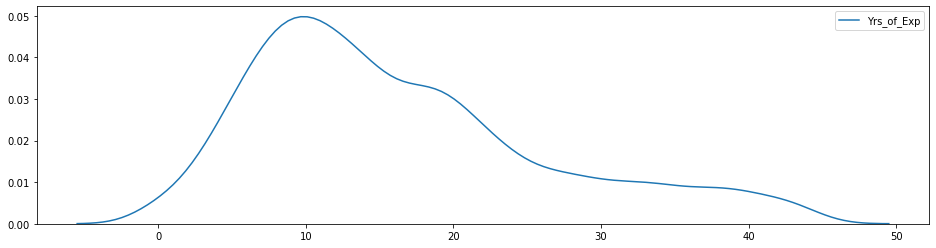

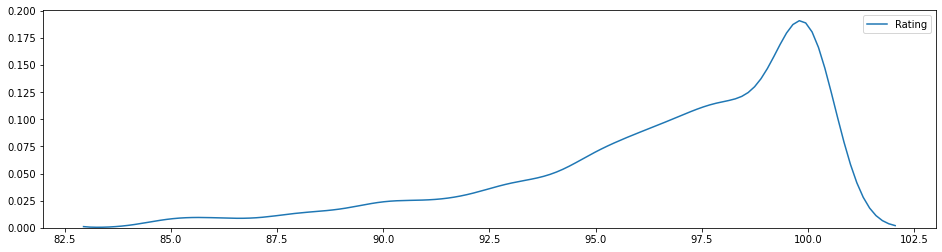

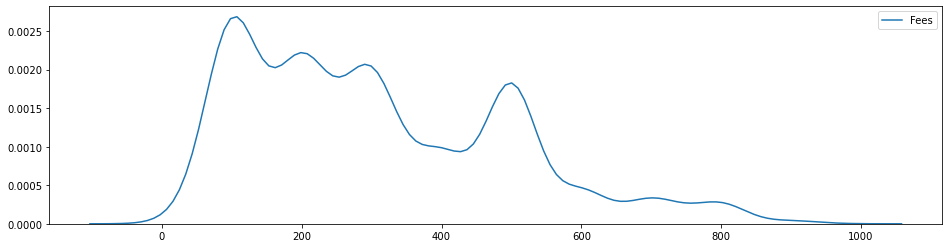

In [163]:
for col in num_var:
    fig_this_size(16,4,)
    sns.kdeplot(df[col])

In [164]:
# skew stats:

In [165]:
df.skew()

Yrs_of_Exp    0.849745
Rating       -1.201637
Fees          0.759976
dtype: float64

In [161]:
# addressing the skew:

In [166]:
#try1 : log transforamtion

np.log1p(df[num_var]).skew()

Yrs_of_Exp   -0.975032
Rating       -1.285719
Fees         -0.311272
dtype: float64

In [167]:
#try2 : sqrt trandfomation
np.sqrt(df[num_var]).skew()

Yrs_of_Exp   -0.030077
Rating       -1.243669
Fees          0.246267
dtype: float64

In [168]:
# try3 : cbrt transformation.
np.cbrt(df[num_var]).skew()

Yrs_of_Exp   -0.836652
Rating       -1.257888
Fees          0.070739
dtype: float64

* Stripping the values increasing the skew of the feature seems to be a better Idea to try now as the trasnformation are not effecitve.

In [169]:
df = df[df.Rating > 85]

In [172]:
len(df)

5273

In [168]:
# we have removed around 700 values total from a dataset of  6000 samples, seems reasonable.

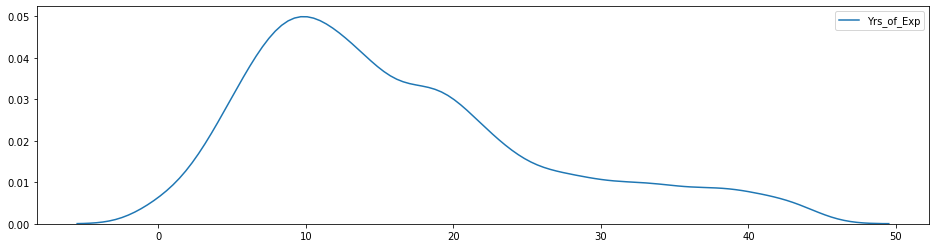

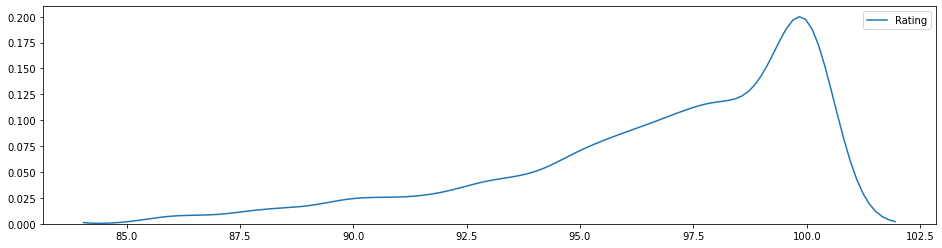

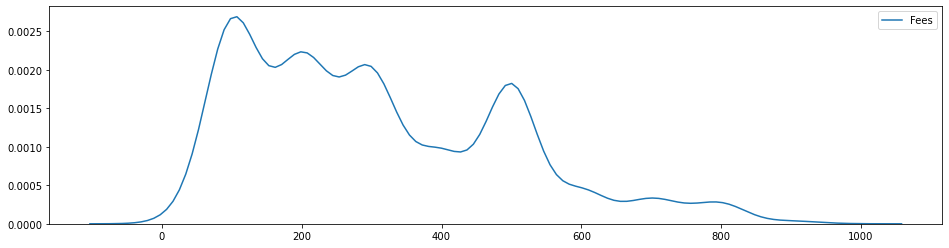

In [173]:
# revised skew
for col in num_var:
    fig_this_size(16,4,)
    sns.kdeplot(df[col])

In [174]:
df.skew()

Yrs_of_Exp    0.857804
Rating       -1.112179
Fees          0.759901
dtype: float64

In [171]:
# These skews look much better than earlier ones.

## Encoding the categorical data

In [175]:
df

Qualification  Yrs_of_Exp  Rating      Place           Profile   Fees
0             BHMS          24   100.0  Ernakulam         Homeopath  100.0
1             BAMS          12    98.0  Bangalore          Ayurveda  350.0
2             MBBS           9   100.0  Bangalore    ENT Specialist  300.0
3            Other          12    88.0  Bangalore          Ayurveda  250.0
4             BAMS          20   100.0    Chennai          Ayurveda  250.0
...            ...         ...     ...        ...               ...    ...
5956          MBBS          19    98.0  Bangalore    ENT Specialist  300.0
5957          MBBS          33    92.0    Chennai  General Medicine  100.0
5958          MBBS          41    97.0      Delhi  General Medicine  600.0
5959          MBBS          15    90.0     Mumbai  General Medicine  100.0
5960           BDS          17   100.0      Delhi           Dentist  200.0

[5273 rows x 6 columns]

In [176]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [177]:
cat_var

['Qualification', 'Place', 'Profile']

In [178]:
enc = OneHotCategoricalEncoder(variables=cat_var)

In [179]:
enc

OneHotCategoricalEncoder(variables=['Qualification', 'Place', 'Profile'])

In [248]:
df = enc.fit_transform(df)
df_test = enc.transform(df_test)

In [181]:
df_cleaned

Qualification  Yrs_of_Exp  Rating      Place           Profile   Fees
0             BHMS          24   100.0  Ernakulam         Homeopath  100.0
1             BAMS          12    98.0  Bangalore          Ayurveda  350.0
2             MBBS           9   100.0  Bangalore    ENT Specialist  300.0
3            Other          12    88.0  Bangalore          Ayurveda  250.0
4             BAMS          20   100.0    Chennai          Ayurveda  250.0
...            ...         ...     ...        ...               ...    ...
1982          BAMS          10   100.0  Bangalore          Ayurveda    NaN
1983            MD           4   100.0    Chennai    Dermatologists    NaN
1984          MBBS           9   100.0    Chennai  General Medicine    NaN
1985           BDS          12    98.0  Bangalore           Dentist    NaN
1986          MBBS           8    92.0    Chennai    Dermatologists    NaN

[7862 rows x 6 columns]

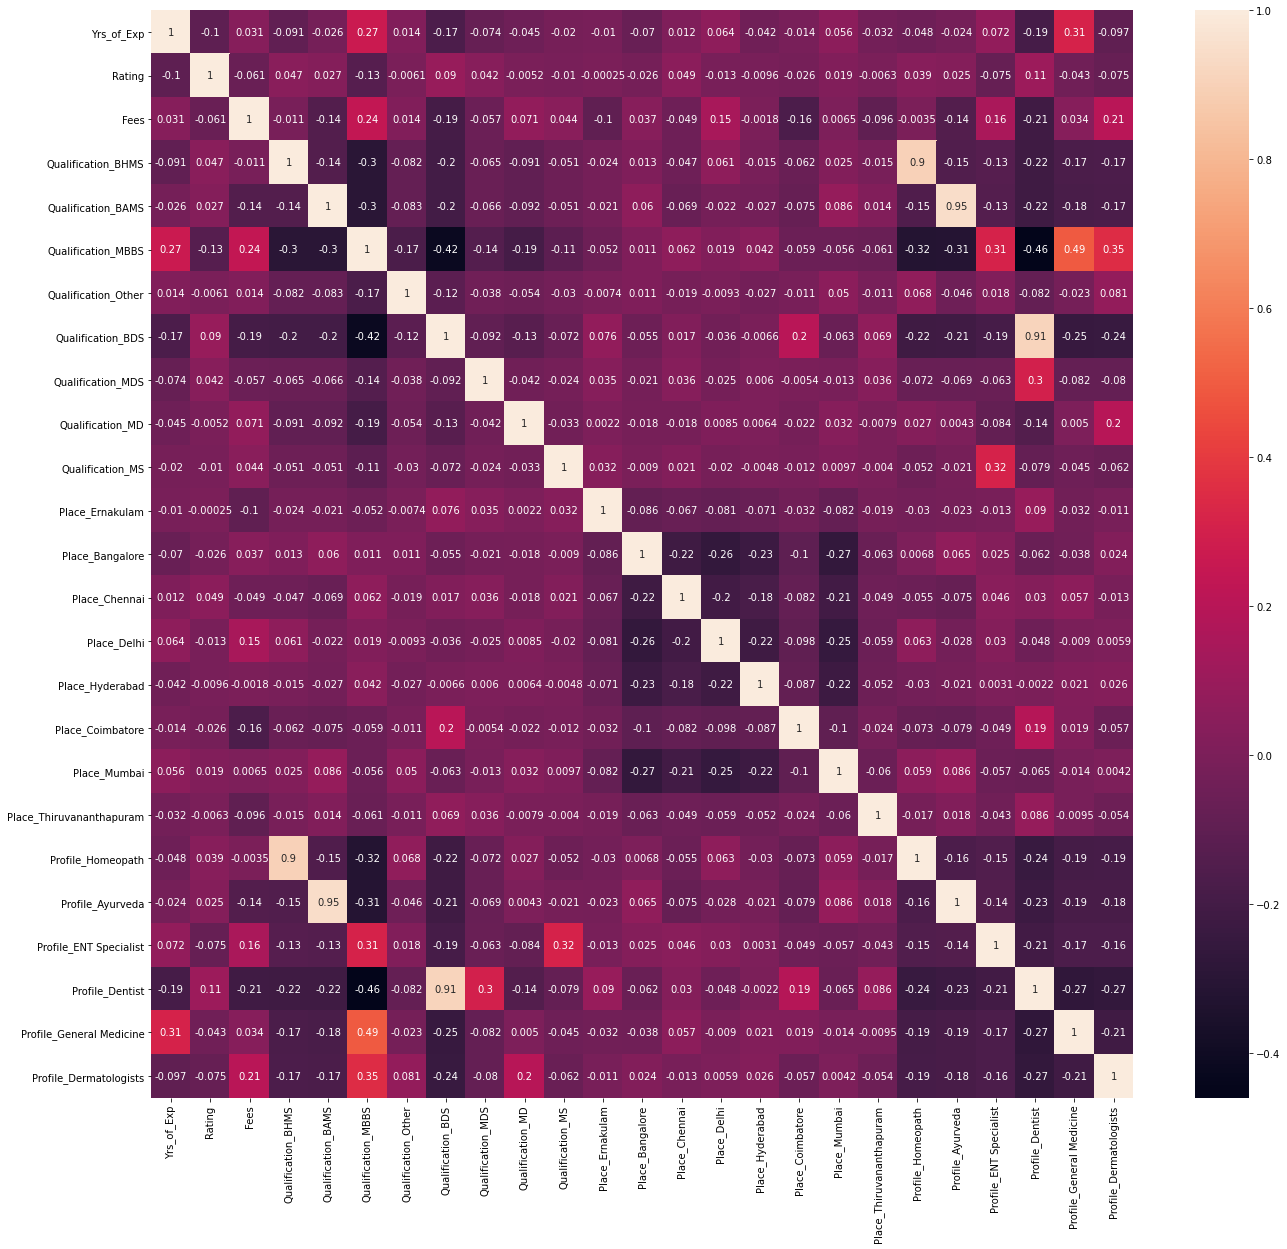

In [182]:
# revised correlation
fig_this_size(22,20)
sns.heatmap(df.corr(),annot=True)

* all good.

In [183]:
df

Yrs_of_Exp  Rating   Fees  Qualification_BHMS  Qualification_BAMS  \
0             24   100.0  100.0                   1                   0   
1             12    98.0  350.0                   0                   1   
2              9   100.0  300.0                   0                   0   
3             12    88.0  250.0                   0                   0   
4             20   100.0  250.0                   0                   1   
...          ...     ...    ...                 ...                 ...   
5956          19    98.0  300.0                   0                   0   
5957          33    92.0  100.0                   0                   0   
5958          41    97.0  600.0                   0                   0   
5959          15    90.0  100.0                   0                   0   
5960          17   100.0  200.0                   0                   0   

      Qualification_MBBS  Qualification_Other  Qualification_BDS  \
0                      0                    0                  0   
1                      0                    0                  0   
2                      1                    0                  0   
3                      0                    1                  0   
4                      0                    0                  0   
...                  ...                  ...                ...   
5956                   1                    0                  0   
5957                   1                    0                  0   
5958                   1                    0                  0   
5959                   1                    0                  0   
5960                   0                    0                  1   

      Qualification_MDS  Qualification_MD  ...  Place_Hyderabad  \
0                     0                 0  ...                0   
1                     0                 0  ...                0   
2                     0                 0  ...                0   
3                     0                 0  ...                0   
4                     0                 0  ...                0   
...                 ...               ...  ...              ...   
5956                  0                 0  ...                0   
5957                  0                 0  ...                0   
5958                  0                 0  ...                0   
5959                  0                 0  ...                0   
5960                  0                 0  ...                0   

      Place_Coimbatore  Place_Mumbai  Place_Thiruvananthapuram  \
0                    0             0                         0   
1                    0             0                         0   
2                    0             0                         0   
3                    0             0                         0   
4                    0             0                         0   
...                ...           ...                       ...   
5956                 0             0                         0   
5957                 0             0                         0   
5958                 0             0                         0   
5959                 0             1                         0   
5960                 0             0                         0   

      Profile_Homeopath  Profile_Ayurveda  Profile_ENT Specialist  \
0                     1                 0                       0   
1                     0                 1                       0   
2                     0                 0                       1   
3                     0                 1                       0   
4                     0                 1                       0   
...                 ...               ...                     ...   
5956                  0                 0                       1   
5957                  0                 0                       0   
5958                  0                 0                       0   


## X and y split

In [184]:
df.head()

Yrs_of_Exp  Rating   Fees  Qualification_BHMS  Qualification_BAMS  \
0          24   100.0  100.0                   1                   0   
1          12    98.0  350.0                   0                   1   
2           9   100.0  300.0                   0                   0   
3          12    88.0  250.0                   0                   0   
4          20   100.0  250.0                   0                   1   

   Qualification_MBBS  Qualification_Other  Qualification_BDS  \
0                   0                    0                  0   
1                   0                    0                  0   
2                   1                    0                  0   
3                   0                    1                  0   
4                   0                    0                  0   

   Qualification_MDS  Qualification_MD  ...  Place_Hyderabad  \
0                  0                 0  ...                0   
1                  0                 0  ...                0   
2                  0                 0  ...                0   
3                  0                 0  ...                0   
4                  0                 0  ...                0   

   Place_Coimbatore  Place_Mumbai  Place_Thiruvananthapuram  \
0                 0             0                         0   
1                 0             0                         0   
2                 0             0                         0   
3                 0             0                         0   
4                 0             0                         0   

   Profile_Homeopath  Profile_Ayurveda  Profile_ENT Specialist  \
0                  1                 0                       0   
1                  0                 1                       0   
2                  0                 0                       1   
3                  0                 1                       0   
4                  0                 1                       0   

   Profile_Dentist  Profile_General Medicine  Profile_Dermatologists  
0                0                         0                       0  
1                0                         0                       0  
2                0                         0                       0  
3                0                         0                       0  
4                0                         0                       0  

[5 rows x 25 columns]

In [185]:
X = df.drop('Fees',1)
y = df['Fees']

In [186]:
# check shape
X.shape,y.shape

((5273, 24), (5273,))

## Train Validation split

In [187]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.33,random_state=42)

In [188]:
# sanity shape check!
X_val.shape,y_val.shape,X_val.shape,y_val.shape

((1741, 24), (1741,), (1741, 24), (1741,))

## Standard Scaling

In [403]:
from sklearn.preprocessing import StandardScaler

In [407]:
sc = StandardScaler()

In [409]:
X_train

StandardScaler()

In [413]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the model.

In [204]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [206]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error

In [218]:
# helper function
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    print('MSE:',mean_squared_error(y_val,y_preds))
    print('MSLE',mean_squared_log_error(y_val,y_preds))  

In [219]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 29560.988833696516
MSLE 0.401706864485284


In [220]:
# try2: Ridge Regression
train_n_ret_scores(Ridge())

MSE: 29560.865814845496
MSLE 0.40168372814557224


In [221]:
# ElasticNet
train_n_ret_scores(ElasticNet(alpha=0.0001))

MSE: 29560.914424045957
MSLE 0.40170156898352216


In [222]:
# try4: SVR
train_n_ret_scores(SVR(kernel='linear'))

MSE: 31312.80999078619
MSLE 0.3867968824339894


In [223]:
# try4: SVR
train_n_ret_scores(SVR())

MSE: 35632.80012443387
MSLE 0.4732224527957569


In [224]:
# try5: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 57132.10509409584
MSLE 0.7327545772958121


In [225]:
# try6: Random Forest
train_n_ret_scores(RandomForestRegressor())

MSE: 36163.40554958791
MSLE 0.4605077214557501


In [226]:
# try9: Adaboost with DC

train_n_ret_scores(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()))

MSE: 43960.768094689425
MSLE 0.5474988921197169


In [227]:
# try 8: Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor())

MSE: 28824.766082161746
MSLE 0.38924896266595616


In [228]:
# try 3 : KNN
train_n_ret_scores(KNeighborsRegressor())

MSE: 35199.1407696726
MSLE 0.4607924248834077


In [235]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),ElasticNet(alpha=0.0001),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso ElasticNet SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','RSLE','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    
    mse = mean_squared_error(y_val,y_preds)
    rmsle = np.sqrt(mean_squared_log_error(y_val,y_preds))
    avgCV = np.mean(cross_val_score(model,X,y))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'RMSLE':rmsle,'meanCV':avgCV},ignore_index=True)


LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=0.0003)
ElasticNet(alpha=0.0001)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor(base_estimator=LinearRegression())


In [236]:
models_df

Model           MSE  RSLE    meanCV     RMSLE
0          Linear  29560.988834   NaN  0.149805  0.633803
1           Ridge  29560.988486   NaN  0.149805  0.633803
2           Lasso  29561.038025   NaN  0.149806  0.633804
3      ElasticNet  29560.914424   NaN  0.149823  0.633799
4             SVR  35632.800124   NaN -0.001400  0.687912
5  Descision_Tree  58269.364970   NaN -0.553451  0.861082
6   Random_Forest  36185.979945   NaN -0.015847  0.679189
7  Gradient_Boost  28815.473087   NaN  0.179006  0.623781
8       Ada_Boost  30604.626593   NaN  0.116346  0.671875

Choosing Gradient Boosting as the best model.

In [237]:
best_model = GradientBoostingRegressor()

In [238]:
best_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [239]:
best_model.score(X_val,y_val)

0.1897002007722609

## Testing on the Test set.

In [249]:
df_test.drop('Fees',1,inplace=True)

In [250]:
test_prediction = best_model.predict(df_test)

In [251]:
test_prediction

array([286.83108567, 382.18395425, 418.35739503, ..., 325.12980848,
       240.75019442, 401.72010551])

In [252]:
pd.DataFrame(test_prediction,columns=['Fees']).to_csv('test_result.csv')

## Saving the model

In [253]:
import joblib

In [254]:
joblib.dump(best_model,'doctors_consuluation.pkl')

['doctors_consuluation.pkl']